Example 1: No Pruning (Overfitting)

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Larger dataset for demonstration
np.random.seed(42)
X = np.random.rand(100, 2) *70  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 100).astype(int)  # Simple rule
y = y.astype(str)
y[y == '0'] = 'No'
y[y == '1'] = 'Yes'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. NO PRUNING - Tree grows freely!
model_no_prune = DecisionTreeClassifier(random_state=42)
model_no_prune.fit(X_train, y_train)

print("=" * 50)
print("NO PRUNING:")
print(f"Tree depth: {model_no_prune.get_depth()}")
print(f"Number of leaves: {model_no_prune.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_no_prune.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_no_prune.predict(X_test)):.3f}")

NO PRUNING:
Tree depth: 3
Number of leaves: 5
Train accuracy: 1.000
Test accuracy: 0.833


Example 2: PRE-PRUNING

PRE-PRUNING:
Tree depth: 2
Number of leaves: 4
Train accuracy: 0.986
Test accuracy: 0.800


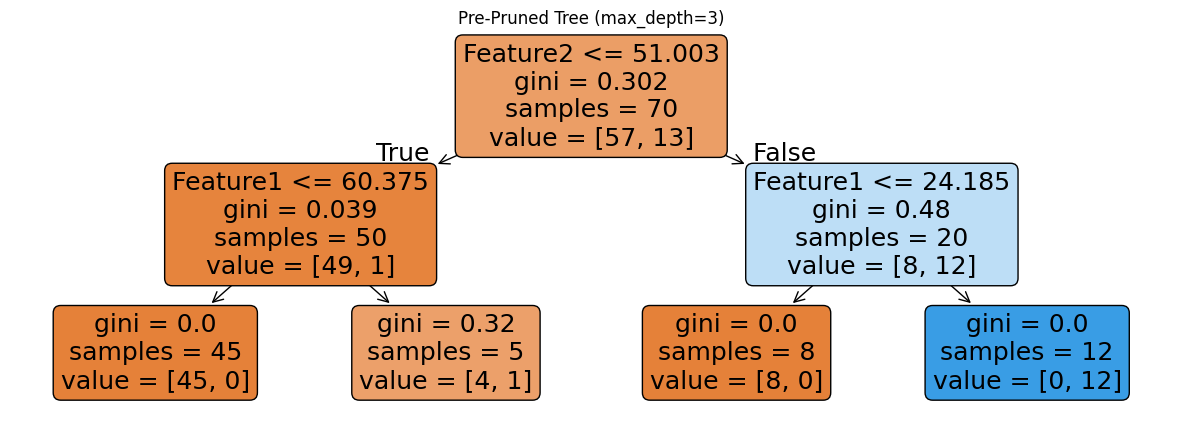

In [12]:
# 2. PRE-PRUNING - Stop early!
model_pre_prune = DecisionTreeClassifier(
    max_depth=3,              # Stop after 3 levels
    min_samples_split=10,     # Need 10+ samples to split
    min_samples_leaf=5,       # Each leaf needs 5+ samples
    random_state=42
)
model_pre_prune.fit(X_train, y_train)

print("=" * 50)
print("PRE-PRUNING:")
print(f"Tree depth: {model_pre_prune.get_depth()}")
print(f"Number of leaves: {model_pre_prune.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_pre_prune.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_pre_prune.predict(X_test)):.3f}")

# Visualize
plt.figure(figsize=(15, 5))
plot_tree(model_pre_prune, filled=True, rounded=True, feature_names=['Feature1', 'Feature2'])
plt.title("Pre-Pruned Tree (max_depth=3)")
plt.show()

Example 3: POST-PRUNING (Cost Complexity)

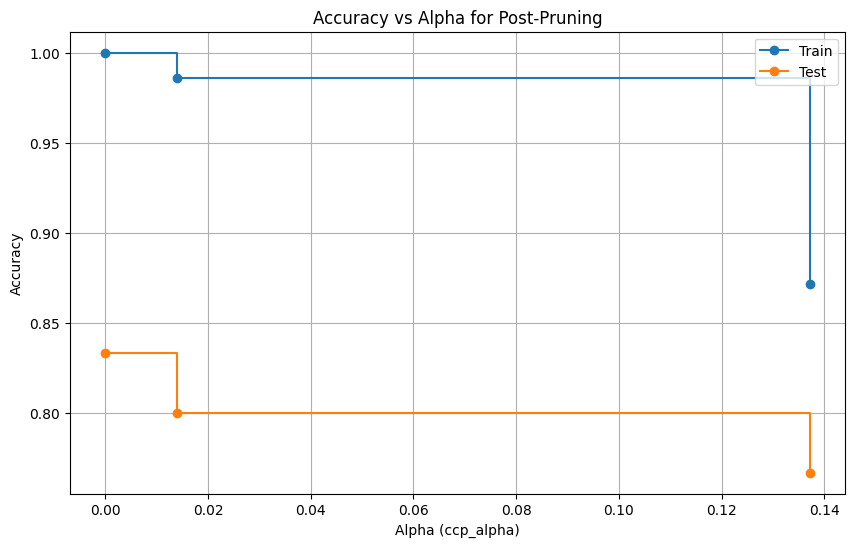

POST-PRUNING:
Best alpha: 0.0000
Tree depth: 3
Number of leaves: 5
Train accuracy: 1.000
Test accuracy: 0.833


In [13]:
# 3. POST-PRUNING - Grow full, then trim!

# First, find best alpha value
path = model_no_prune.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove last value

# Train models with different alphas
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

# Plot alpha vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Post-Pruning")
plt.legend()
plt.grid()
plt.show()

# Use best alpha
best_alpha = ccp_alphas[np.argmax(test_scores)]
model_post_prune = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model_post_prune.fit(X_train, y_train)

print("=" * 50)
print("POST-PRUNING:")
print(f"Best alpha: {best_alpha:.4f}")
print(f"Tree depth: {model_post_prune.get_depth()}")
print(f"Number of leaves: {model_post_prune.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_post_prune.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_post_prune.predict(X_test)):.3f}")

MODEL A: NO PRUNING
Tree depth: 1
Number of leaves: 2
Train accuracy: 1.000
Test accuracy: 1.000
MODEL B: PRE-PRUNING (max_depth=2)
Tree depth: 1
Number of leaves: 2
Train accuracy: 1.000
Test accuracy: 1.000
MODEL C: POST-PRUNING (ccp_alpha=0.01)
Tree depth: 1
Number of leaves: 2
Train accuracy: 1.000
Test accuracy: 1.000


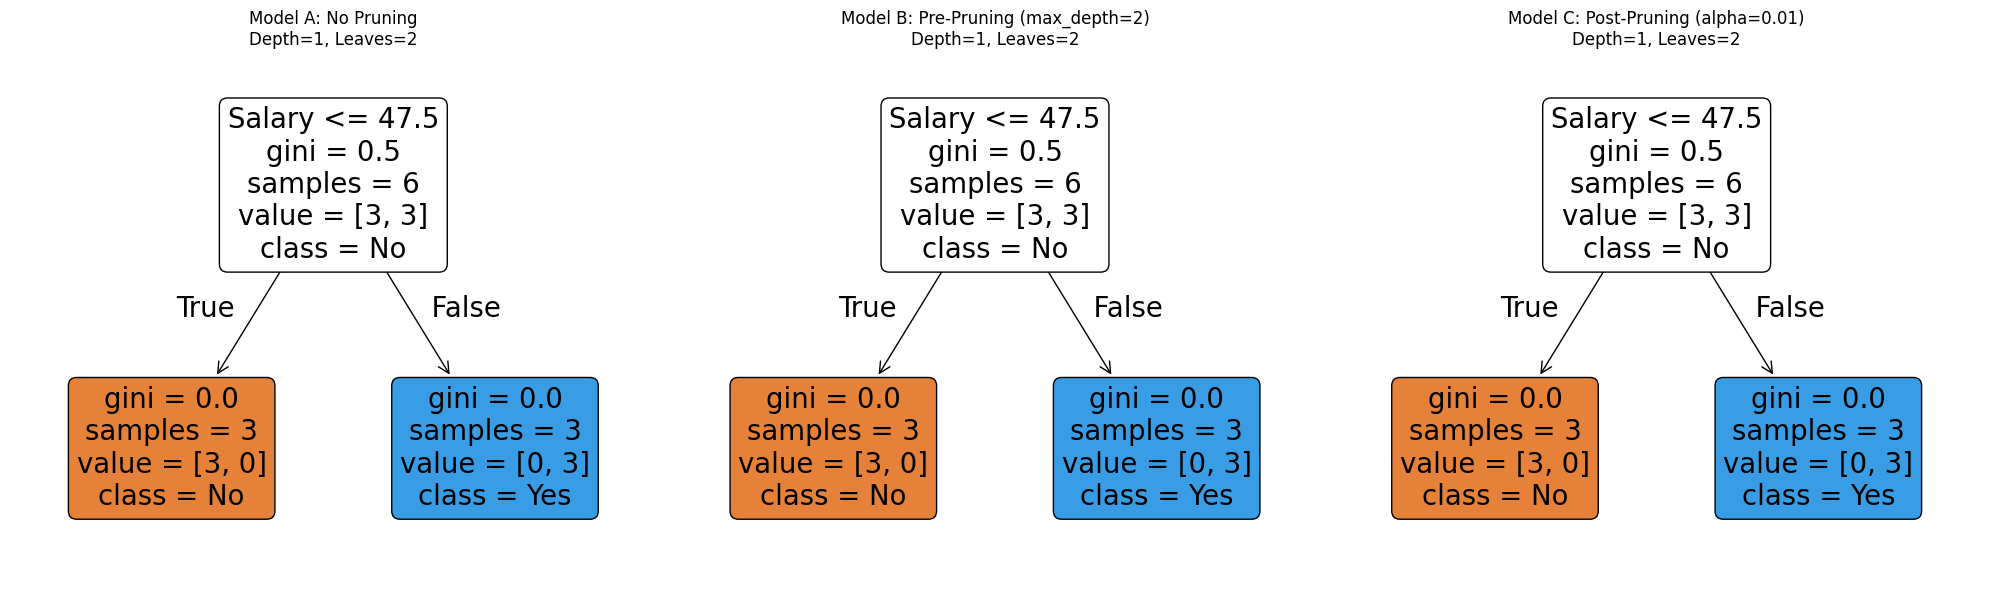


COMPARISON SUMMARY:
Model           Depth    Leaves   Train Acc    Test Acc    
------------------------------------------------------------
A: No Prune     1        2        1.000        1.000       
B: Pre-Prune    1        2        1.000        1.000       
C: Post-Prune   1        2        1.000        1.000       


In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Purchase dataset
X = np.array([
    [25, 30, 0],
    [35, 60, 1],
    [45, 80, 0],
    [20, 20, 1],
    [35, 70, 0],
    [52, 90, 1],
    [23, 25, 0],
    [40, 65, 1]
])
y = np.array(['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# MODEL A: NO PRUNING
# ==========================================
model_a = DecisionTreeClassifier(random_state=42)
model_a.fit(X_train, y_train)

print("=" * 60)
print("MODEL A: NO PRUNING")
print(f"Tree depth: {model_a.get_depth()}")
print(f"Number of leaves: {model_a.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_a.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_a.predict(X_test)):.3f}")

# ==========================================
# MODEL B: PRE-PRUNING (max_depth=2)
# ==========================================
model_b = DecisionTreeClassifier(max_depth=2, random_state=42)
model_b.fit(X_train, y_train)

print("=" * 60)
print("MODEL B: PRE-PRUNING (max_depth=2)")
print(f"Tree depth: {model_b.get_depth()}")
print(f"Number of leaves: {model_b.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_b.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_b.predict(X_test)):.3f}")

# ==========================================
# MODEL C: POST-PRUNING (ccp_alpha=0.01)
# ==========================================
model_c = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
model_c.fit(X_train, y_train)

print("=" * 60)
print("MODEL C: POST-PRUNING (ccp_alpha=0.01)")
print(f"Tree depth: {model_c.get_depth()}")
print(f"Number of leaves: {model_c.get_n_leaves()}")
print(f"Train accuracy: {accuracy_score(y_train, model_c.predict(X_train)):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, model_c.predict(X_test)):.3f}")

# ==========================================
# BONUS: VISUALIZE ALL 3 TREES
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Model A
plot_tree(model_a, ax=axes[0], filled=True, rounded=True, 
          feature_names=['Age', 'Salary', 'Gender'],
          class_names=['No', 'Yes'])
axes[0].set_title(f"Model A: No Pruning\nDepth={model_a.get_depth()}, Leaves={model_a.get_n_leaves()}")

# Model B
plot_tree(model_b, ax=axes[1], filled=True, rounded=True,
          feature_names=['Age', 'Salary', 'Gender'],
          class_names=['No', 'Yes'])
axes[1].set_title(f"Model B: Pre-Pruning (max_depth=2)\nDepth={model_b.get_depth()}, Leaves={model_b.get_n_leaves()}")

# Model C
plot_tree(model_c, ax=axes[2], filled=True, rounded=True,
          feature_names=['Age', 'Salary', 'Gender'],
          class_names=['No', 'Yes'])
axes[2].set_title(f"Model C: Post-Pruning (alpha=0.01)\nDepth={model_c.get_depth()}, Leaves={model_c.get_n_leaves()}")

plt.tight_layout()
plt.savefig('pruning_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("COMPARISON SUMMARY:")
print(f"{'Model':<15} {'Depth':<8} {'Leaves':<8} {'Train Acc':<12} {'Test Acc':<12}")
print("-" * 60)
print(f"{'A: No Prune':<15} {model_a.get_depth():<8} {model_a.get_n_leaves():<8} "
      f"{accuracy_score(y_train, model_a.predict(X_train)):<12.3f} "
      f"{accuracy_score(y_test, model_a.predict(X_test)):<12.3f}")
print(f"{'B: Pre-Prune':<15} {model_b.get_depth():<8} {model_b.get_n_leaves():<8} "
      f"{accuracy_score(y_train, model_b.predict(X_train)):<12.3f} "
      f"{accuracy_score(y_test, model_b.predict(X_test)):<12.3f}")
print(f"{'C: Post-Prune':<15} {model_c.get_depth():<8} {model_c.get_n_leaves():<8} "
      f"{accuracy_score(y_train, model_c.predict(X_train)):<12.3f} "
      f"{accuracy_score(y_test, model_c.predict(X_test)):<12.3f}")